In [46]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pickle as pk


In [2]:
data=pd.read_csv('voice.csv')

In [3]:
data['gender']=pd.get_dummies(data.label)['male']
data.drop(['label'],inplace=True,axis=1)


In [4]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,gender
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [6]:
X,y=data[data.columns[:-1]].values.astype(np.float32),data['gender'].values.astype(np.float32)


In [8]:
X,y=shuffle(X,y,random_state=0)


In [26]:
X_tr,X_t, y_tr,y_t=train_test_split(X,y,test_size=0.2)

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_t = scaler.transform(X_t)

pca = PCA(0.90)
pca.fit(X_tr)
X_tr = pca.transform(X_tr)
X_t = pca.transform(X_t)




In [48]:
pk.dump(pca, open("pca.pkl","wb"))
pk.dump(scaler, open("scaler.pkl","wb"))


In [40]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu',input_shape=(X_tr.shape[1],)))
model.add(tf.keras.layers.Dense(50,activation='relu',))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [41]:
trained_model = model.fit(X_tr,y_tr,validation_data=(X_t,y_t),batch_size=32,epochs=30)


Epoch 1/30
80/80 [==============================] - 2s 12ms/step - loss: 0.4603 - accuracy: 0.8071 - val_loss: 0.1628 - val_accuracy: 0.9511
Epoch 2/30
80/80 [==============================] - 1s 9ms/step - loss: 0.1585 - accuracy: 0.9460 - val_loss: 0.1165 - val_accuracy: 0.9621
Epoch 3/30
80/80 [==============================] - 1s 9ms/step - loss: 0.1354 - accuracy: 0.9552 - val_loss: 0.1007 - val_accuracy: 0.9685
Epoch 4/30
80/80 [==============================] - 1s 9ms/step - loss: 0.1038 - accuracy: 0.9660 - val_loss: 0.0979 - val_accuracy: 0.9669
Epoch 5/30
80/80 [==============================] - 1s 9ms/step - loss: 0.0867 - accuracy: 0.9763 - val_loss: 0.0878 - val_accuracy: 0.9700
Epoch 6/30
80/80 [==============================] - 1s 9ms/step - loss: 0.0864 - accuracy: 0.9663 - val_loss: 0.0825 - val_accuracy: 0.9779
Epoch 7/30
80/80 [==============================] - 1s 9ms/step - loss: 0.0928 - accuracy: 0.9712 - val_loss: 0.0767 - val_accuracy: 0.9795
Epoch 8/30
80/80 [=

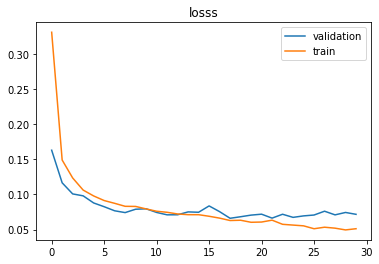

In [43]:

plt.plot(trained_model.history['val_loss'])
plt.plot(trained_model.history['loss'])
plt.legend(('validation','train'))
plt.title('losss')
plt.show()


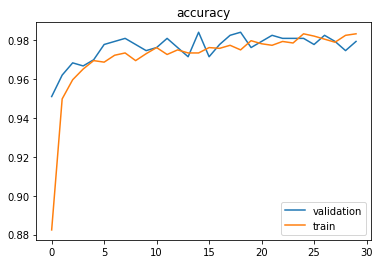

In [44]:
plt.plot(trained_model.history['val_accuracy'])
plt.plot(trained_model.history['accuracy'])
plt.legend(('validation','train'))
plt.title('accuracy')
plt.show()

In [45]:
tf.keras.models.save_model(model,'model.h5')